In [173]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [174]:
df = pd.read_csv('C:\\Users\\Chris\\python_notes\\MAIT_python\\Datasets\\MAIT_cleaned.csv')

## Story 1 Analysis: Reproduction

On a scale of 1 to 7, the average morality rating of Story 1 was **1.96** (lower means less moral):

In [175]:
df['s1.moralGEN'].mean()

1.9607843137254901

Among participants who read about an in-group perpetrator, the average morality rating was **2.09**:

In [176]:
s1_ingroup = df['s1.group'] == 'in'
s1_in_moralGEN = df[s1_ingroup]['s1.moralGEN']
ingroup_condition_mean = df[s1_ingroup]['s1.moralGEN'].mean()
ingroup_condition_std = df[s1_ingroup]['s1.moralGEN'].std()
ingroup_condition_mean, ingroup_condition_std

(2.085714285714286, 1.6155754496814578)

Among pp's who read about an out-group perpetrator, the average morality rating was **1.69**:

In [177]:
s1_outgroup = df['s1.group'] == 'out'
s1_out_moralGEN = df[s1_outgroup]['s1.moralGEN']
outgroup_condition_mean = df[s1_outgroup]['s1.moralGEN'].mean()
outgroup_condition_std = df[s1_outgroup]['s1.moralGEN'].std()
outgroup_condition_mean, outgroup_condition_std

(1.6875, 0.6020797289396148)

## T-Test
Based on this result we cannot reject the null hypothesis (statistic=1.277, pvalue=0.208):

In [178]:
ttest_ind(df[s1_ingroup]['s1.moralGEN'], df[s1_outgroup]['s1.moralGEN'], equal_var=False)

Ttest_indResult(statistic=1.2770753302463267, pvalue=0.20774479530420978)

## PP's per condition

In [179]:
len(df[s1_ingroup]['s1.moralGEN'])

35

In [180]:
len(df[s1_outgroup]['s1.moralGEN'])

16

## Plots
### Ingroup

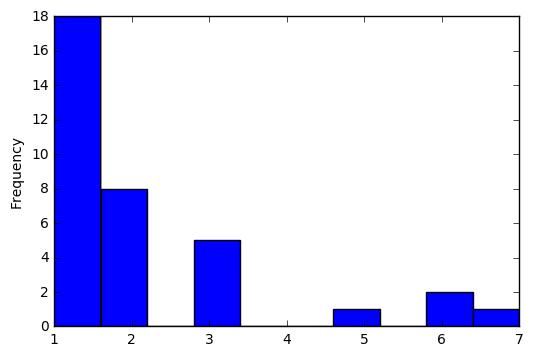

In [181]:
df[s1_ingroup]['s1.moralGEN'].plot(kind='hist', xlim=(1,7))

## Outgroup

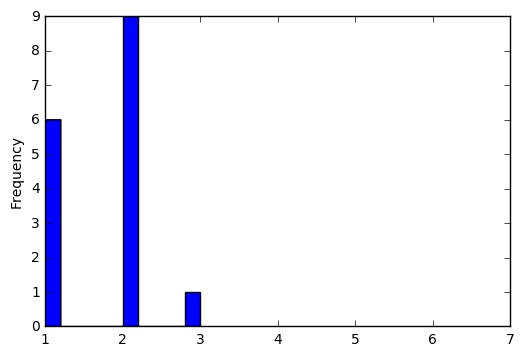

In [182]:
df[s1_outgroup]['s1.moralGEN'].plot(kind='hist', xlim=(1,7))

## Glorification Inter-item Reliability
Compute correlation matrix for the glorification items to determine whether they hang together.

In [183]:
glor = df[['glor1', 'glor2', 'glor3', 'glor4', 'glor5', 'glor6', 'glor7']]

In [184]:
glor.corr()

,glor1,glor2,glor3,glor4,glor5,glor6,glor7
glor1,1.000000,0.449206,0.620135,0.458426,0.369847,0.714422,0.294257
glor2,0.449206,1.000000,0.505198,0.634064,0.332955,0.495764,0.338035
glor3,0.620135,0.505198,1.000000,0.541427,0.402189,0.493316,0.175426
glor4,0.458426,0.634064,0.541427,1.000000,0.213433,0.477380,0.311898
glor5,0.369847,0.332955,0.402189,0.213433,1.000000,0.351089,0.044802
glor6,0.714422,0.495764,0.493316,0.477380,0.351089,1.000000,0.230124
glor7,0.294257,0.338035,0.175426,0.311898,0.044802,0.230124,1.000000


Based on this result I would remove glorificaiton items 5 and 7 from a computation of participant's glorification scores.